In [1]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classical_CartPole-v1')

3925


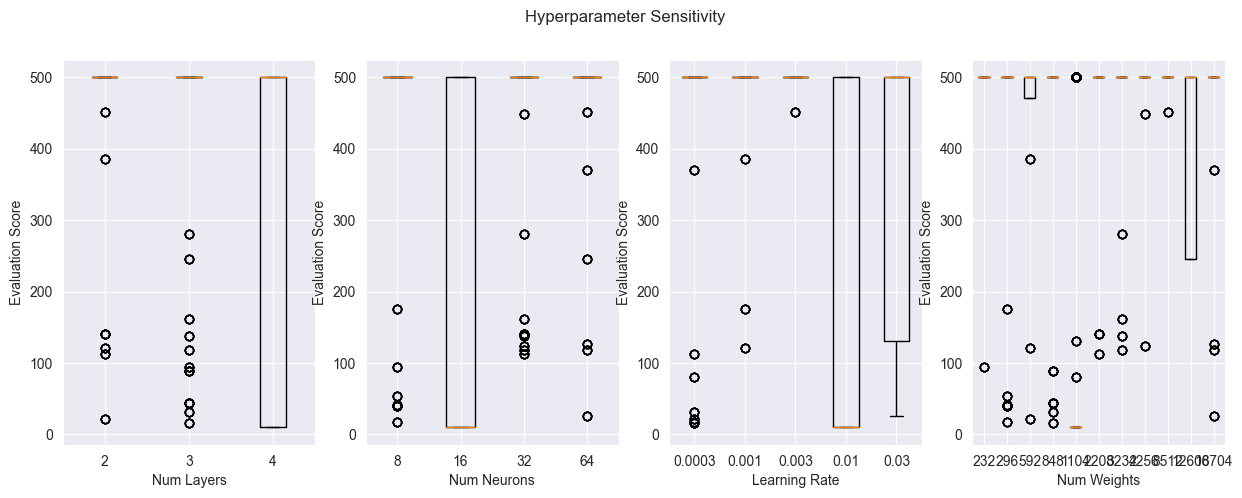

In [3]:
import numpy as np

best_episodes = episodes.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()

best_episodes = pd.merge(best_episodes, episodes, on=['trial_id', 'evaluation_score'], how='left')

# Create box plots for each hyperparameter configuration
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Hyperparameter Sensitivity')

layer_values = np.sort(episodes['layers'].unique())
axs[0].boxplot([best_episodes[best_episodes['layers'] == l]['evaluation_score'] for l in layer_values])
axs[0].set_xticklabels(layer_values)
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Evaluation Score')

neuron_values = np.sort(episodes['neurons'].unique())
axs[1].boxplot([best_episodes[best_episodes['neurons'] == n]['evaluation_score'] for n in neuron_values])
axs[1].set_xticklabels(neuron_values)
axs[1].set_xlabel('Num Neurons')
axs[1].set_ylabel('Evaluation Score')

lr_values = np.sort(episodes['learning_rate'].unique())
axs[2].boxplot([best_episodes[best_episodes['learning_rate'] == lr]['evaluation_score'] for lr in
                lr_values])
axs[2].set_xticklabels(lr_values)
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Evaluation Score')

weight_values = np.sort(episodes['number_of_weights'].unique())
axs[3].boxplot([best_episodes[best_episodes['number_of_weights'] == w]['evaluation_score'] for w in
                weight_values])
axs[3].set_xticklabels(weight_values)
axs[3].set_xlabel('Num Weights')
axs[3].set_ylabel('Evaluation Score')

plt.show()


Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Nodes')

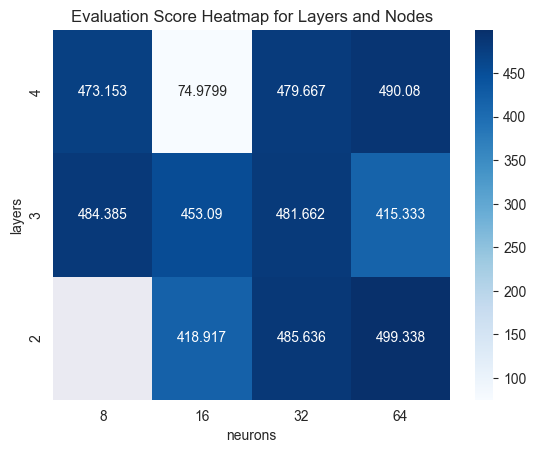

In [4]:
# Create a pivot table to aggregate the evaluation score by layers and neurons
layers_nodes = best_episodes.pivot_table(index='layers', columns='neurons', values='evaluation_score', aggfunc='mean')

# Create a heatmap for layers and neurons
sns.heatmap(layers_nodes, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Nodes')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Learning Rate')

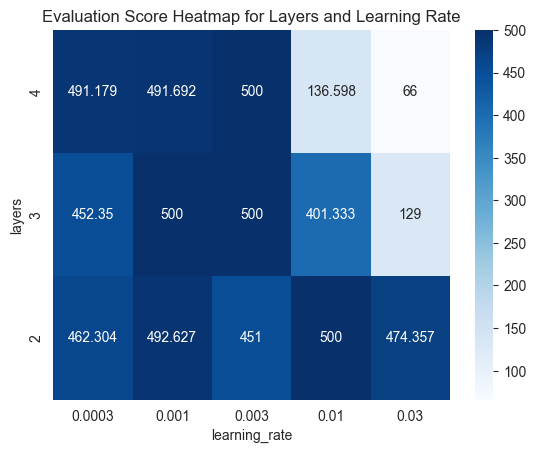

In [5]:
# Create a pivot table to aggregate the evaluation score by layers and learning rate
layers_lr = best_episodes.pivot_table(index='layers', columns='learning_rate', values='evaluation_score',
                                      aggfunc='mean')

# Create a heatmap for layers and learning rate
sns.heatmap(layers_lr, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Learning Rate')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Learning Rate and Nodes')

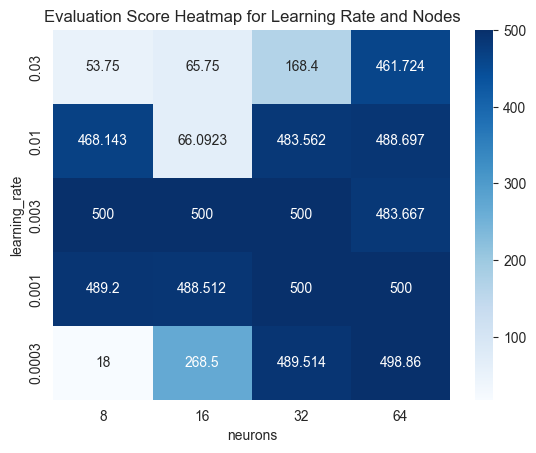

In [6]:
# Create a pivot table to aggregate the evaluation score by learning rate and nodes
lr_nodes = best_episodes.pivot_table(index='learning_rate', columns='neurons', values='evaluation_score',
                                     aggfunc='mean')

# Create a heatmap for learning rate and nodes
sns.heatmap(lr_nodes, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Learning Rate and Nodes')
